In [1]:
import sys
sys.path.insert(0,'..')  # add project root to PATH

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2
from matplotlib import pyplot as plt
from src.annotated_image import Image
from src.preprocessing import get_hue_sat_val, hue_jittering, sat_val_jittering

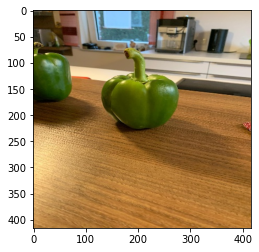

In [4]:
#set path
file_path = "../data/luk_001_pap.jpg"
# load image
image = Image(path=file_path)
image.show()

In [5]:
#set jitter parameters
hue_range = 0.1
sat_range = 1.5
val_range = 1.5

In [6]:
#get hue, saturation, value separately and scaled to [0,1]
hue, sat, val = get_hue_sat_val(image.image_data, False)

#randomnly change hue, sat, val 
hue = hue_jittering(hue, hue_range)
sat = sat_val_jittering(sat, sat_range)
val = sat_val_jittering(val, val_range)

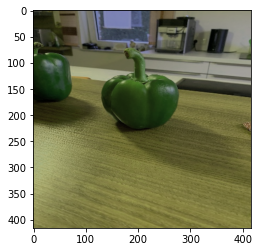

In [7]:
#convert to rgb + check result
img_hsv_jit = cv2.merge([hue, sat, val])
img_rgb_jit = cv2.cvtColor(img_hsv_jit.copy(), cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_jit)